---
# Scipy
---

<img src="./img/scipy-logo-300.png">

## Outils de calculs scientifiques pour Python

Collection d'algorithmes mathématiques et autres fonctions utiles basés sur Numpy.<br/>
Organisé en sous-catégories couvrant différents dommaines scientifiques (signal, stats, cluster, ...)

doc : http://www.scipy.org/

| Subpackage | Description   |
|------|------|
|cluster|Clustering algorithms|
|constants|Physical and mathematical constants|
|<b>fftpack</b>|Fast Fourier Transform routines|
|integrate|Integration and ordinary differential equation solvers|
|<b>interpolate</b>|Interpolation and smoothing splines|
|io|Input and Output|
|linalg|Linear algebra|
|ndimage|N-dimensional image processing|
|odr|Orthogonal distance regression|
|optimize|Optimization and root-finding routines|
|<b>signal</b>|Signal processing|
|sparse|Sparse matrices and associated routines|
|spatial|Spatial data structures and algorithms|
|special|Special functions|
|stats|Statistical distributions and functions|
|weave|C/C++ integration|

In [3]:
import numpy as np
import scipy
from scipy import interpolate
from scipy import fftpack
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io.wavfile import read


# Exemple 1 : Interpolations

- Voici des données à interpoler.
Nous allons les interpoler de manière linéaire et cubique et tracer le résultat sur une figure.

on va utiliser [scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp1d.html)

rappel sur les interpolations [ici](https://fr.wikipedia.org/wiki/Interpolation_num%C3%A9rique) 

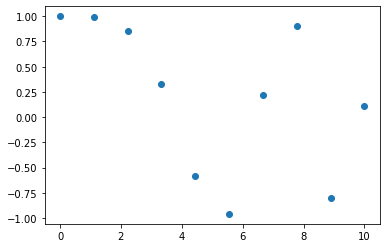

In [4]:
#Données :
x = np.linspace(0, 10, num=10)
y = np.cos(-x**2/9.0)

plt.plot(x,y, 'o')


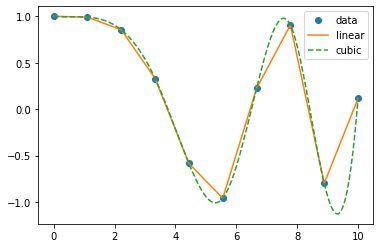

In [6]:
# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y, 'cubic')

# Tracés :
xnew = np.linspace(0, 10,num=1000)
f1_inter = f1(xnew)
f2_inter = f2(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--')
ax.legend(['data', 'linear', 'cubic'], loc='best')

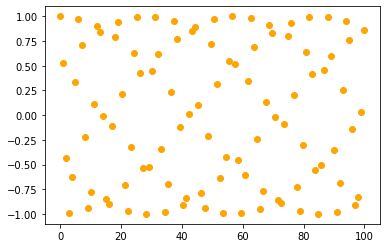

In [7]:
#Données :
x = np.linspace(0, 100,num=100)
y = np.cos(x)

plt.plot(x,y, 'o',color='orange')

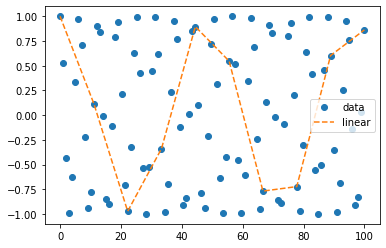

In [8]:
# Interpolations :
f1 = scipy.interpolate.interp1d(x, y,'quadratic')
xnew = np.linspace(0, 100, num=10)
f1_inter = f1(xnew)

# Tracé :
fig, ax = plt.subplots()
ax.plot(x, y, 'o',xnew, f1_inter, '--')
ax.legend(['data', 'linear'], loc='best')

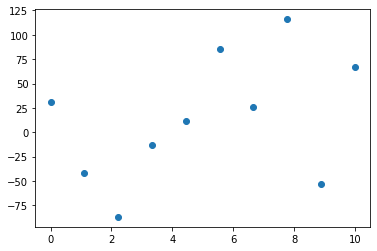

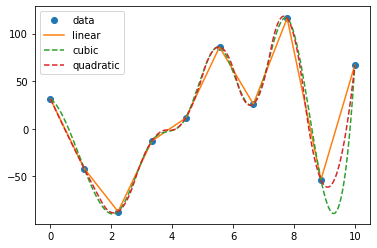

In [9]:
#Données :
x = np.linspace(0, 10, num=10)
y = x**3 /10+ np.random.randn(10)*60
plt.plot(x,y, 'o')


# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y, 'cubic')
f3 = scipy.interpolate.interp1d(x, y, 'quadratic')

# Tracés :
xnew = np.linspace(0, 10, num=410, endpoint=True)
f1_inter = f1(xnew)
f2_inter = f2(xnew)
f3_inter = f3(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--', xnew,f3_inter, '--')
ax.legend(['data', 'linear', 'cubic','quadratic'], loc='best')


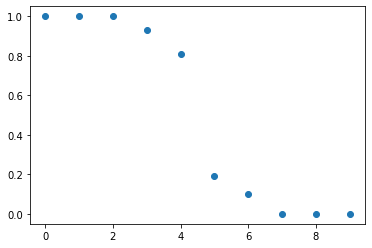

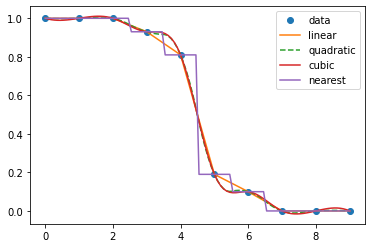

In [10]:
#Données :
x = np.linspace(0, 9, num=10)
y = [1,1,1,0.93,0.81,0.19,0.1,0,0,0]
plt.plot(x,y, 'o')


# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y,'quadratic')
f3 = scipy.interpolate.interp1d(x, y, 'cubic')
f4 = scipy.interpolate.interp1d(x, y,'nearest')

# Tracés :
xnew = np.linspace(0, 9, num=100, endpoint=True)
f1_inter = f1(xnew)
f2_inter = f2(xnew)
f3_inter = f3(xnew)
f4_inter = f4(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--',xnew,f3_inter,xnew,f4_inter)
ax.legend(['data', 'linear','quadratic', 'cubic','nearest'], loc='best')

## Exemple 2 : FFT + Filtrage

### Etape 1 : Ouvrir et afficher un son

- On souhaite ouvrir un fichier son ("speech.wav" dans Data), et afficher ce son + le lire.
- Fréquence d'echantillonage du son : 11025 Hz

(11025, array([128, 128, 128, ..., 128, 128, 128], dtype=uint8))
11025
(16640,)
duree du son : 1.509297052154195secondes
16640


Text(0, 0.5, 'Amplitude')

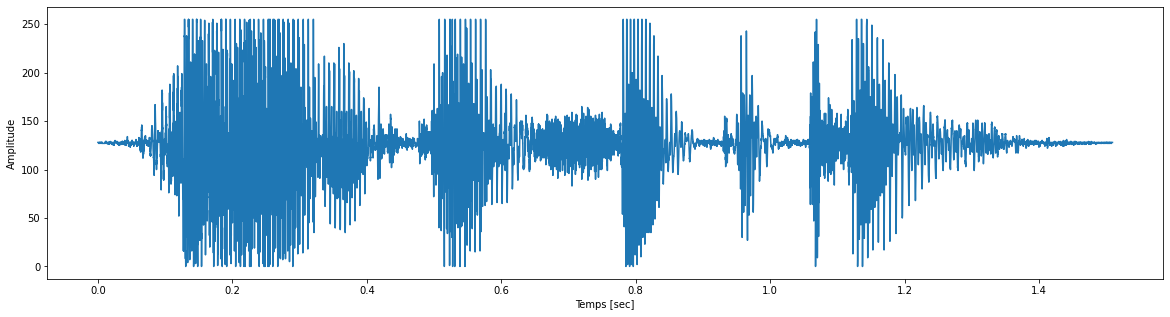

In [15]:

# read audio samples
fe, audio = read("./data/speech.wav")
print(input_data)

print(fe)
print(audio.shape)
print("duree du son : "+ str(audio.size/fe) + "secondes")

# Création du signal
times = np.arange(0,audio.size/fe , 1./fe, dtype = 'float64')  # Vecteur temps
l = times.size
print(l)

# Figure
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(times, audio)
ax.set_xlabel('Temps [sec]')
ax.set_ylabel('Amplitude')

In [19]:
import IPython.display
from ipywidgets import interact, interactive, fixed

IPython.display.Audio(data=audio, rate=fe/1)
# IPython.display.Audio(data=audio, rate=fe/2)
# IPython.display.Audio(data=audio, rate=fe/0.5)

### Etape 2 : Calcul et tracé du spectre

- Pour voir le contenu fréquentiel de notre signal, nous allons calculer le "spectre" du signal et le tracer. <br/> 
La FFT (Fast Fourier Transform) est une transformation mathématique qui donne une vision de ce spectre de manière "assez simple"

Text(0, 0.5, 'PSD [V**2/Hz]')

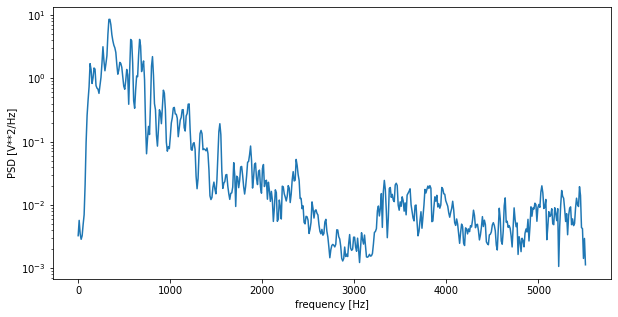

In [26]:
# Calcul du spectre
f, Pxx_den = signal.welch(audio, fe, nperseg=1024)

# Tracé
fig, ax = plt.subplots(figsize=(10,5)) 
ax.semilogy(f, Pxx_den)   #  plot with log scaling on the y axis
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')


(0.0, 1000.0)

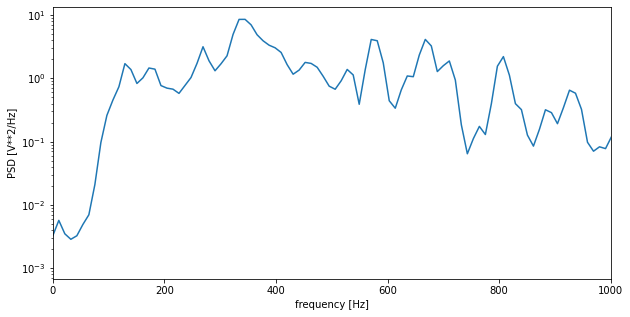

In [28]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.semilogy(f, Pxx_den)   #  plot with log scaling on the y axis
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

ax.set_xlim(0, 1000)

**Conclusion : F0 = 120 Hz environ 

F0 est de 129.19921875 Hz


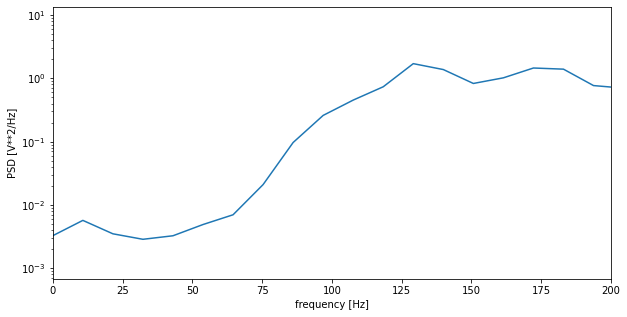

In [29]:
fig, ax = plt.subplots(figsize=(10,5)) 
ax.semilogy(f, Pxx_den)   #  plot with log scaling on the y axis
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

ax.set_xlim(0, 200)


#determination de F0
pidxs = f< 200 
F0=f[np.argmax(Pxx_den[pidxs])] #donne l'index du max

print("F0 est de " + str(F0) + " Hz")

### Etape 3 : Filtrage du signal

- Notre signal est bruité.. On va nettoyer le signal à l'aide d'un filtre qui enlève toutes les fréquences > 4000 et < 100 Hz (passe-bande)

1. Création du filtre : 

11025
[0.018140589569160998, 0.7256235827664399]
[ 1.         -3.11861302  2.00057869  1.75019293 -0.28194023 -2.90822839
  0.53194122  1.46082331  0.08979627 -0.52150812 -0.10277322  0.07548938
  0.02424156]
[ 0.15568024  0.         -0.93408144  0.          2.33520361  0.
 -3.11360481  0.          2.33520361  0.         -0.93408144  0.
  0.15568024]


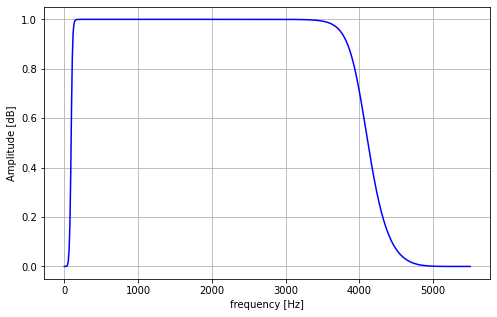

In [38]:
# Paramètres de notre filtre :
f_lowcut = 100.
f_hicut = 4000.

print(fe)
nyq = 0.5 * fe
N = 6                  # Ordre du filtre
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction
print(Wn)

# Création du filtre :
b, a = scipy.signal.butter(N, Wn, 'band')
print(a)
print(b)

# Calcul de la reponse en fréquence du filtre
w, h = signal.freqz(b, a)

# Tracé de la réponse en fréquence du filtre
fig, ax = plt.subplots(figsize=(8,5)) 

ax.plot(0.5*fe*w/np.pi, np.abs(h), 'b')

ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')


2 : On applique ce filtre à notre signal

Text(0, 0.5, 'Amplitude')

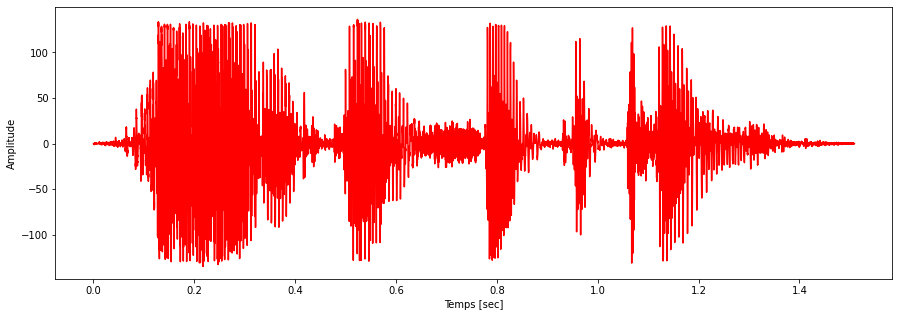

In [39]:
# Applique le filtre au signal :
filtered_sig = scipy.signal.filtfilt(b, a, audio)

# Tracé du signal filtré
fig, ax = plt.subplots(figsize=(15,5)) 
ax.plot(times, filtered_sig, 'r')
ax.set_xlabel('Temps [sec]')
ax.set_ylabel('Amplitude')

In [37]:
#jouons ce son filtré : 
IPython.display.Audio(data=filtered_sig, rate=fe/1)

In [17]:
#pour comparaison, signal original
IPython.display.Audio(data=audio, rate=fe/1)

### Etape 4 : Tracé du spectre du signal filtré

Text(0, 0.5, 'PSD [V**2/Hz]')

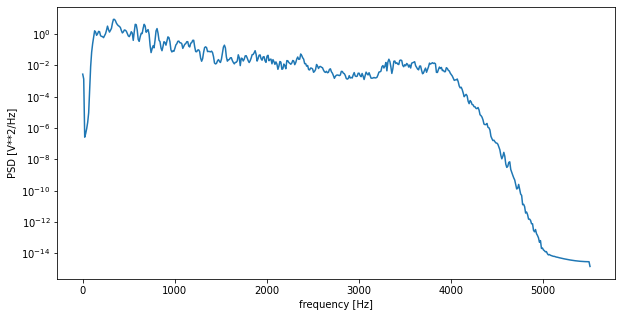

In [40]:
# Calcul du spectre
f, Pxx_den = signal.welch(filtered_sig, fe, nperseg=1024)

# Tracé
fig, ax = plt.subplots(figsize=(10,5)) 
ax.semilogy(f, Pxx_den)   #  plot with log scaling on the y axis
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('PSD [V**2/Hz]')

# Bonus : différence filt & filtfilt

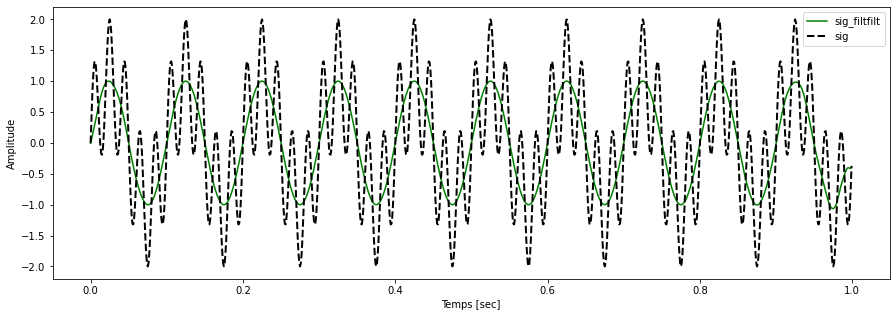

In [43]:
# Applique le filtre au signal :
fs = 1000.
times = np.arange(1000)/fs
sig = np.sin(2*np.pi*50.*times) + np.sin(2*np.pi*10.*times)

# creation du filtre
f1, f2 = 40., 100.  # Hz
Wn = [f1/fs*2.,f2/fs*2.]  # Nyquist frequency fraction
b, a = scipy.signal.butter(8, Wn, 'bandstop')


sig_lfilter = scipy.signal.lfilter(b, a, sig, axis=0)
sig_filtfilt = scipy.signal.filtfilt(b, a, sig)

# Tracé du signal filtré
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(times, sig_lfilter, 'r',label='sig_lfilter')
ax.plot(times, sig_filtfilt, 'g', label='sig_filtfilt')
ax.plot(times, sig, 'k', ls='--', lw=2, label='sig')

ax.set_xlabel('Temps [sec]')
ax.set_ylabel('Amplitude')
ax.legend()
#ax.set_xlim(0.2, 0.5)